In [1]:
%%HTML
<style> code {background-color : pink !important;} </style>

In [2]:
# Code for running the advanced lane finding project 

#Author - Srikant Rao 

## Import statements 

import numpy as np 
import cv2
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import glob 
import os 
import pickle 

##################################################################################
######################### Camera Calibration ##################################### 
##################################################################################

# Defining a function based on code from lecture notes to calibrate a camera 

def camera_calibration(filepath,numx,numy):
    """ Calculates the Camera Matrix and the Distortion Matrix of a Camera based on a set of 
        chessboard images """
    
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((numx*numy,3), np.float32)
    objp[:,:2] = np.mgrid[0:numx, 0:numy].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

    # Make a list of calibration images
    images = glob.glob(filepath)
    
    count = 0
    for imgname in images:
        img = mpimg.imread(imgname)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
        # Find the Chessboard corners 
        ret,corners = cv2.findChessboardCorners(gray,(numx,numy),None)
        
        if ret:
            count +=1
            imgpoints.append(corners)
            objpoints.append(objp)
            
        # Draw the chessboard corners now 
        img = cv2.drawChessboardCorners(img,(numx,numy),corners,ret)
        
        #Calibrate the cameras - Returns the Camera Matrix and the distortion coeffs
        ret,mtx,dist,rvecs,tvecs = cv2.calibrateCamera(objpoints,imgpoints,gray.shape[::-1],None,None)
        
        #Return the Distortion and Camera matrices as they are needed to undistort images
    print(count, " number of images were used for camera calibration")
    return dist,mtx 

In [3]:
# Defining a function to Undistort images based on code in lectures 

def undistort_image(image,dist,mtx):
    undist_image = cv2.undistort(image,mtx,dist,mtx)
    return undist_image

In [5]:
# Calibrate the camera once and store the distortion and Camera matrix in a pickle file 

filepath = 'camera_cal/calibration*.jpg'
dist,mtx = camera_calibration(filepath,9,6)

# Save this to a pickle file 
pickle.dump( [dist,mtx], open( "matrices.pickle", "wb" ) )
                
print('Data cached in pickle file.')
print("Path to the pickle file is: ","matrices.pickle")

17  number of images were used for camera calibration
Data cached in pickle file.
Path to the pickle file is:  matrices.pickle


Plotting is completed ..


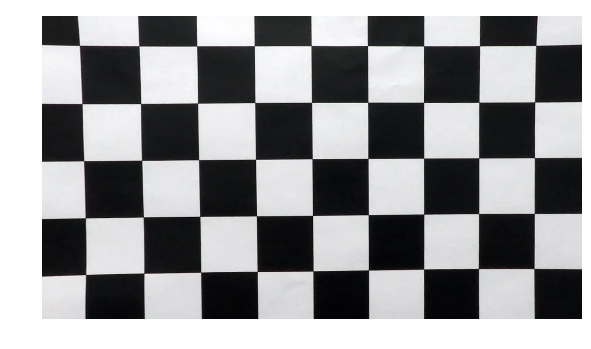

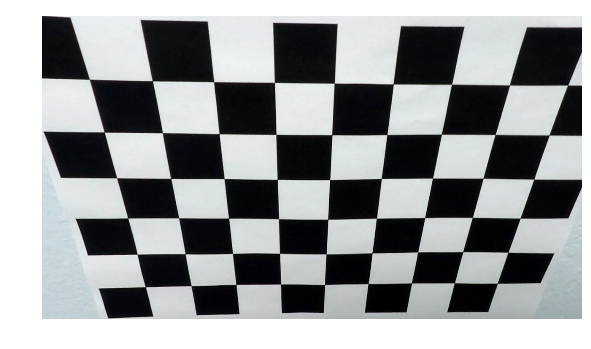

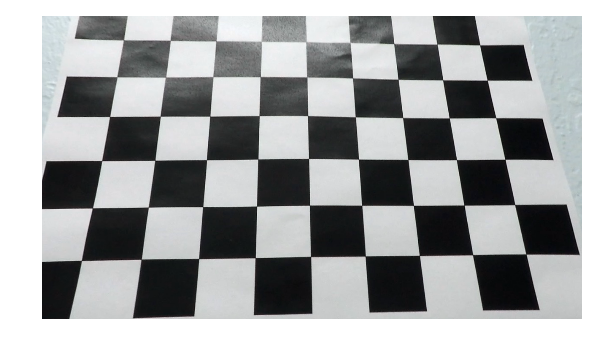

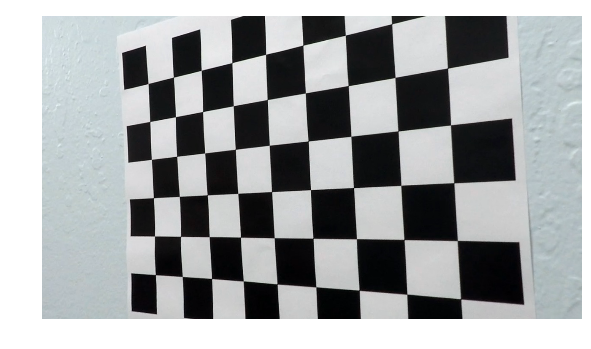

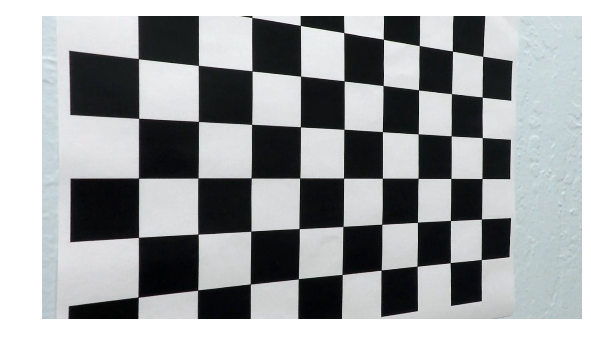

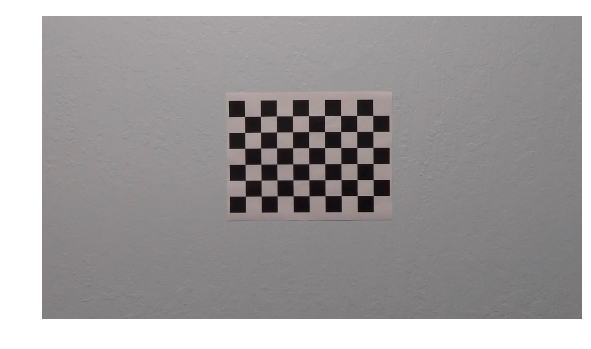

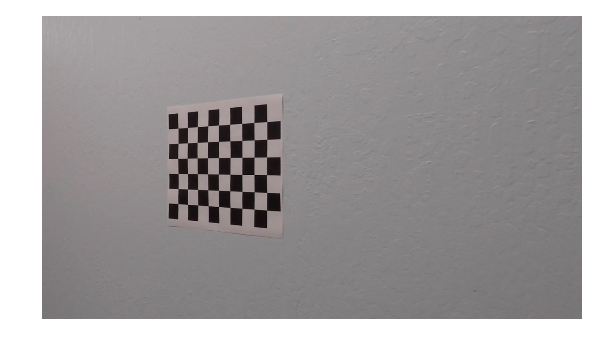

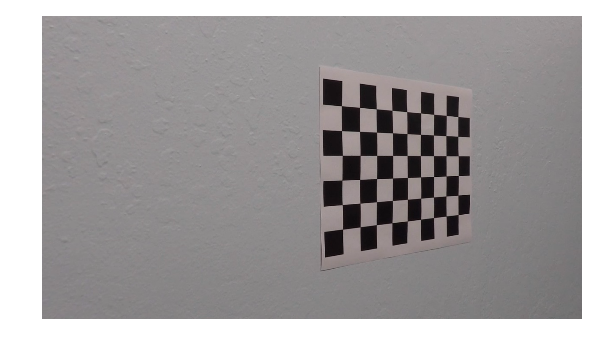

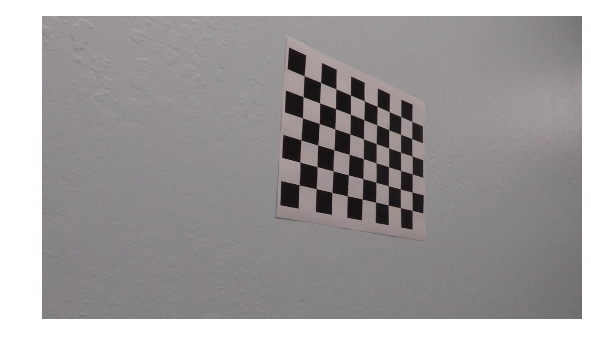

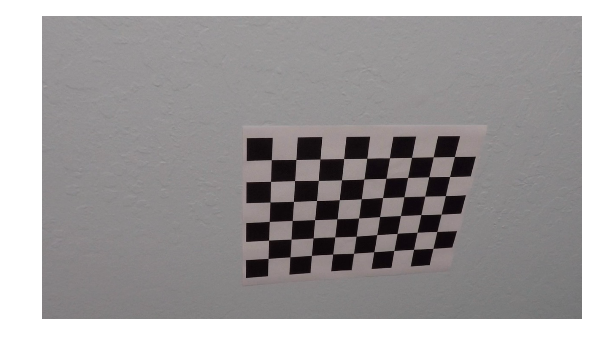

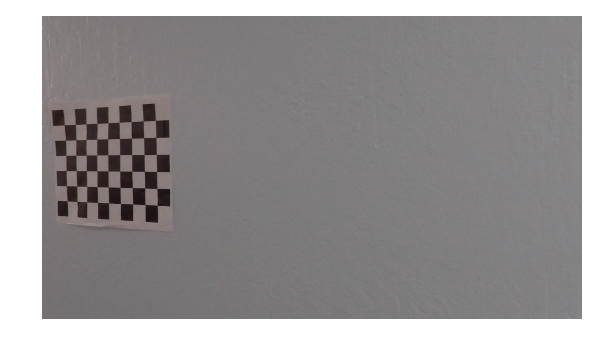

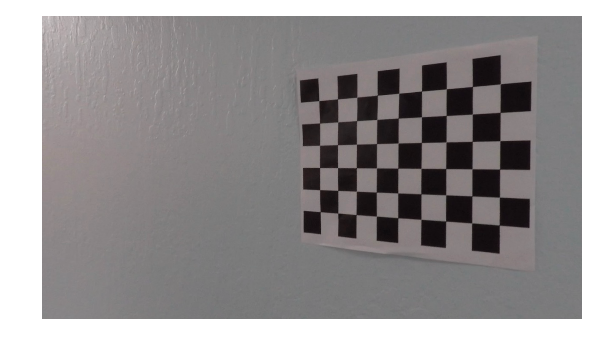

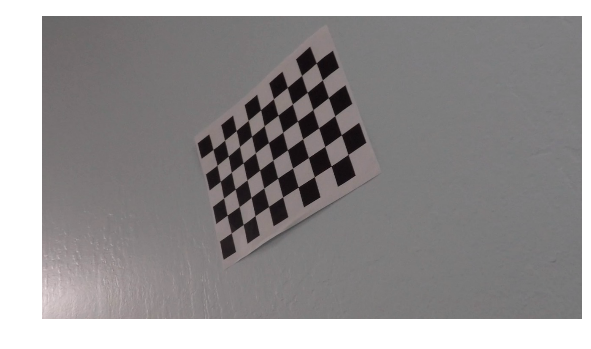

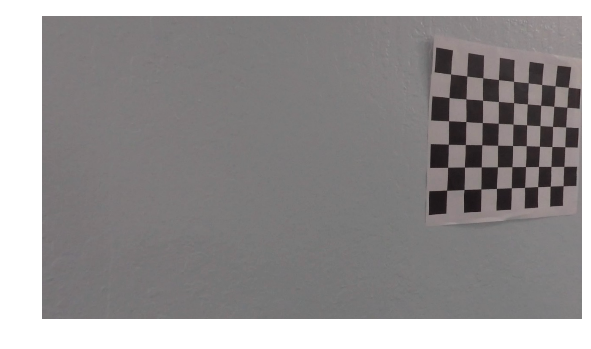

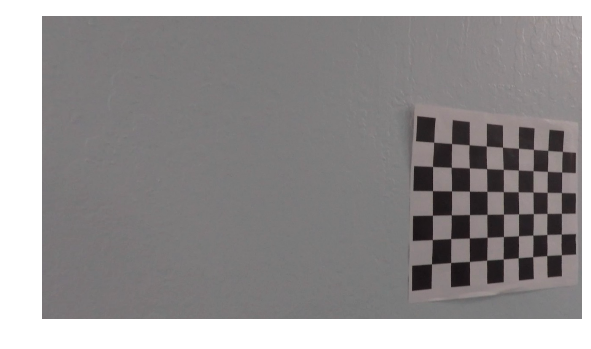

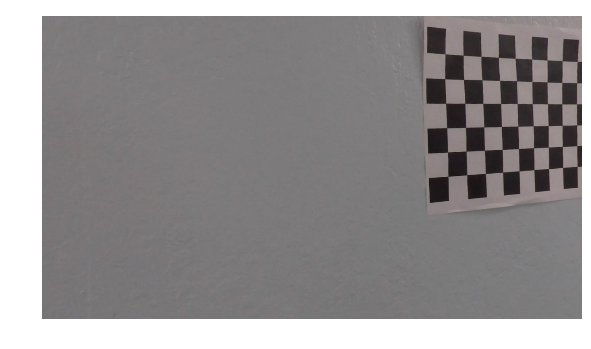

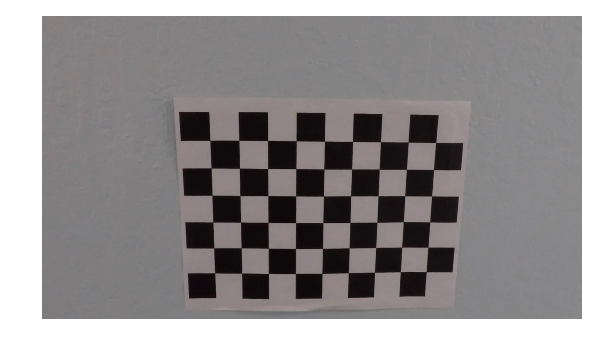

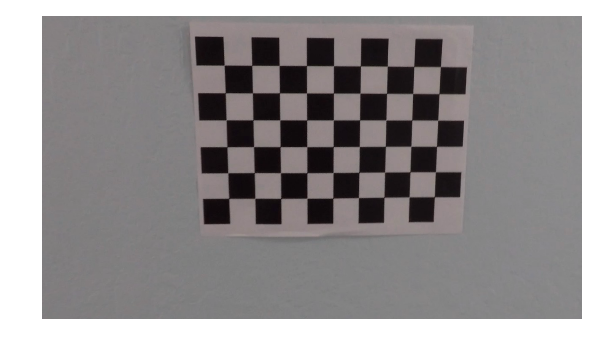

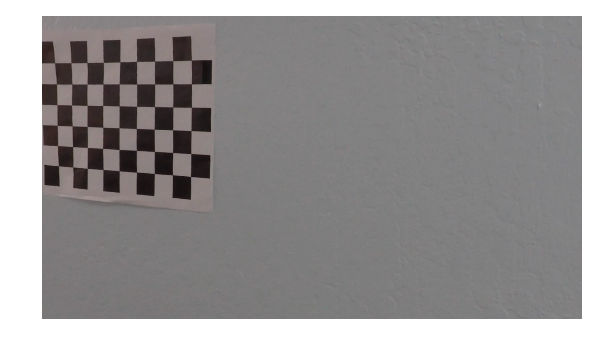

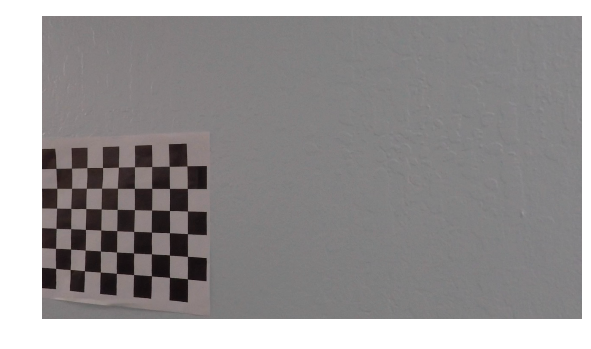

In [6]:
%matplotlib inline

for i in range(20):
    fname = 'camera_cal/calibration'+ str(i+1) + '.jpg'
    img = cv2.imread(fname)
    
    #Undistort the image 
    ud_img = undistort_image(img,dist,mtx)
    
    #Save the image in a different folder 
    mpimg.imsave('camera_undistorted/calibration'+ str(i+1) + '.jpg',ud_img)
    
    # Plot the undistorted images 
    plt.figure(figsize=(32, 32))
    i=1
    plt.subplot(5, 4, i)  # A grid of 8 rows x 8 columns
    plt.axis('off')
    i += 1
    _ = plt.imshow(ud_img)
    #plt.show()

print("Plotting is completed ..")